In [18]:
import scipy.optimize as opt
from scipy.optimize import LinearConstraint
from scipy.special import xlogy

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')

# What is this notebook ?
This notebook illustrates the blog post "About Free Energy".

# Free Energy Objective

In [22]:
def entropy(proba_dist, world_weights):
    return -(xlogy(proba_dist[0],proba_dist[0]/world_weights[0]) + 
      xlogy(proba_dist[1],proba_dist[1]/world_weights[1]))
    
def free_energy(proba_dist, thresh, energies, world_weights):
    return proba_dist.dot(energies) - thresh*entropy(proba_dist, world_weights)

# Line World Setup

In [39]:
N_cells = 100

N_not_bounded = N_cells**2
N_bounded = N_cells

E_not_bounded=0
E_bounded=-1000

In [40]:
thresh_space = np.linspace(0,1000, 200)

proba_mat = []
for thresh in thresh_space:
    result = opt.minimize(free_energy, x0 = np.array([0.5,0.5]), 
             args = (thresh,
                     np.array([E_not_bounded, E_bounded]), 
                     np.array([N_not_bounded, N_bounded])), 
             constraints = LinearConstraint(np.array([1.0,1.0]), 1.0, 1.0))
    proba_mat.append(result.x)
proba_mat = np.array(proba_mat)

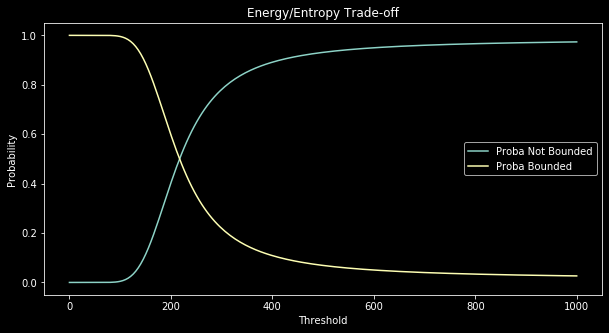

In [41]:
plt.figure(figsize=(10,5))
plt.plot(thresh_space, proba_mat[:,0], label="Proba Not Bounded")
plt.plot(thresh_space, proba_mat[:,1], label="Proba Bounded")
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Probability')
plt.title('Energy/Entropy Trade-off')
plt.show()

## Changing N

In [42]:
N_cells = 10

N_not_bounded = N_cells**2
N_bounded = N_cells

E_not_bounded=0
E_bounded=-1000

In [43]:
thresh_space = np.linspace(0,1000, 200)

proba_mat = []
for thresh in thresh_space:
    result = opt.minimize(free_energy, x0 = np.array([0.5,0.5]), 
             args = (thresh,
                     np.array([E_not_bounded, E_bounded]), 
                     np.array([N_not_bounded, N_bounded])), 
             constraints = LinearConstraint(np.array([1.0,1.0]), 1.0, 1.0))
    proba_mat.append(result.x)
proba_mat = np.array(proba_mat)

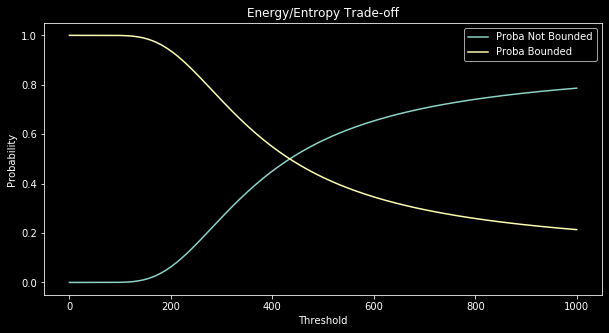

In [44]:
plt.figure(figsize=(10,5))
plt.plot(thresh_space, proba_mat[:,0], label="Proba Not Bounded")
plt.plot(thresh_space, proba_mat[:,1], label="Proba Bounded")
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Probability')
plt.title('Energy/Entropy Trade-off')
plt.show()